In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load training data, skipping header
train_df = pd.read_csv('./Training Data/Train.csv', skiprows=1, header=None)
X_train = train_df.iloc[:, :-1].values  # Features: columns 0 to 4
y_train = train_df.iloc[:, -1].values   # Target: last column

In [10]:
# Normalize features
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train_norm = (X_train - X_mean) / X_std

# Add bias term (column of ones)
X_train_aug = np.c_[np.ones(X_train_norm.shape[0]), X_train_norm]

In [11]:
# Compute theta using normal equation
theta = np.linalg.inv(X_train_aug.T @ X_train_aug) @ X_train_aug.T @ y_train

In [12]:
# Load test data, skipping header
test_df = pd.read_csv('./Testing Data/Test.csv', skiprows=1, header=None)
X_test = test_df.values

# Normalize test features using training mean and std
X_test_norm = (X_test - X_mean) / X_std
X_test_aug = np.c_[np.ones(X_test_norm.shape[0]), X_test_norm]

In [13]:
# Predict target values
y_pred = X_test_aug @ theta

# Save predictions
pd.DataFrame({'target': y_pred}).to_csv('Predicted.csv', index=False)

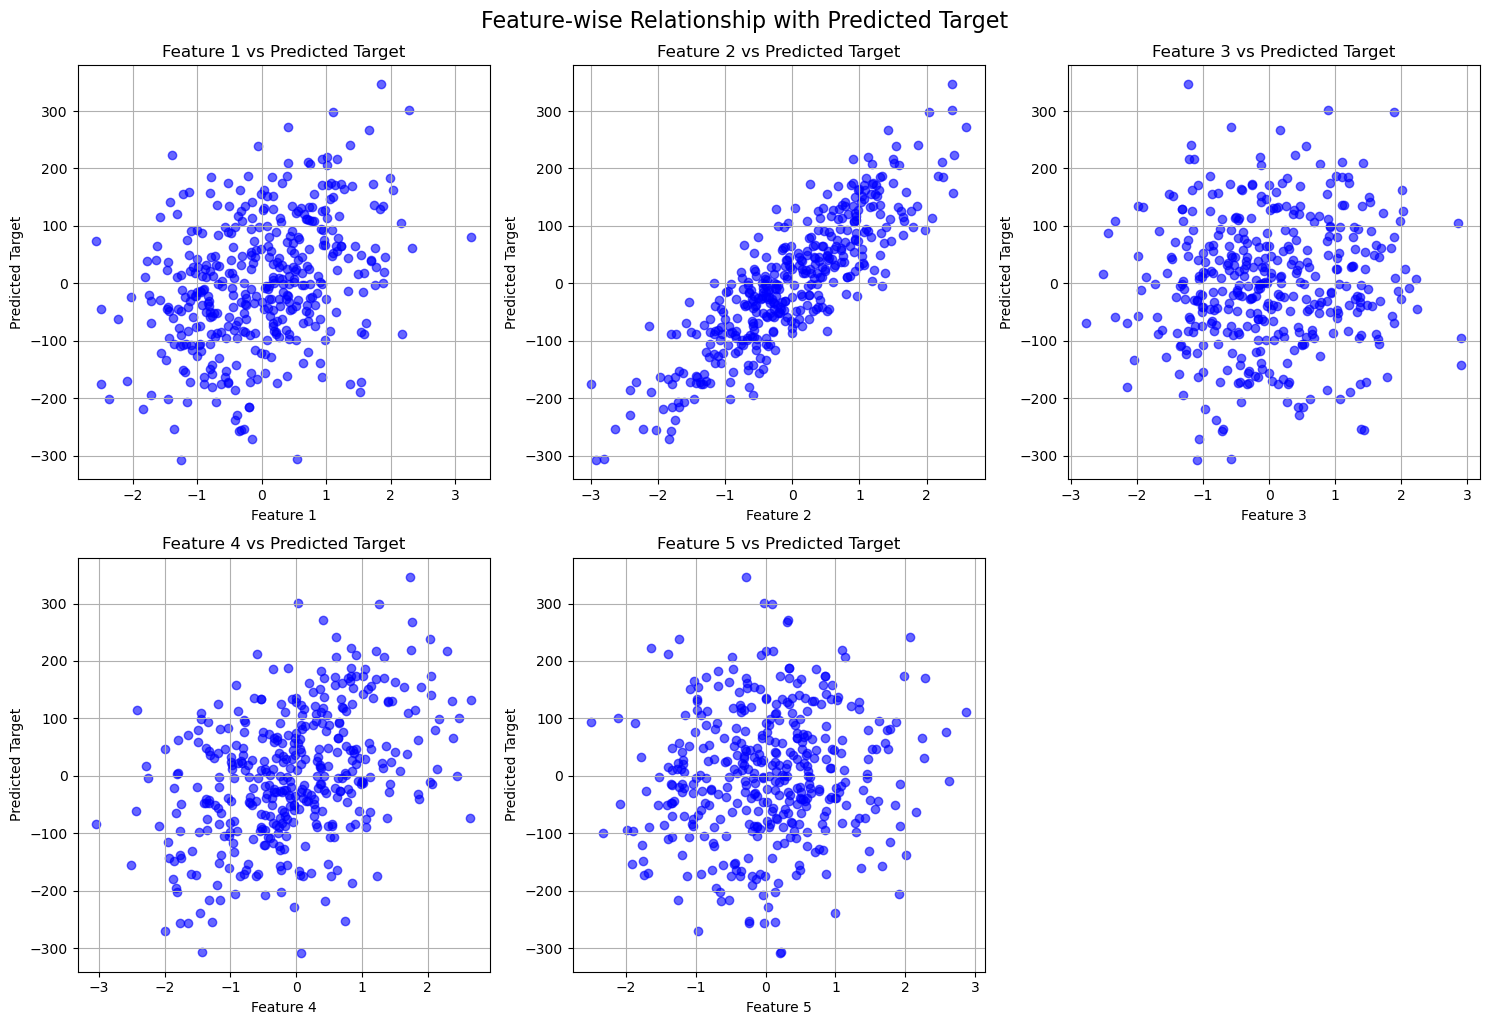

In [14]:
# Plot predictions
# Load Test.csv again (skip header)
test_df = pd.read_csv('./Testing Data/Test.csv', skiprows=1, header=None)

# Feature names for labeling
feature_names = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5']

# Create subplots
plt.figure(figsize=(15, 10))

for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.scatter(test_df.iloc[:, i], y_pred, color='blue', alpha=0.6)
    plt.xlabel(feature_names[i])
    plt.ylabel('Predicted Target')
    plt.title(f'{feature_names[i]} vs Predicted Target')
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Feature-wise Relationship with Predicted Target', fontsize=16, y=1.02)
plt.show()